In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pylab as plt
import urllib.request as req
from pandas import Series, DataFrame
from konlpy.corpus import kolaw
from matplotlib import font_manager,rc
font_name= font_manager.FontProperties(fname='c:\windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)
import nltk
from konlpy.tag import Okt
okt=Okt()
import time
from wordcloud import WordCloud,STOPWORDS

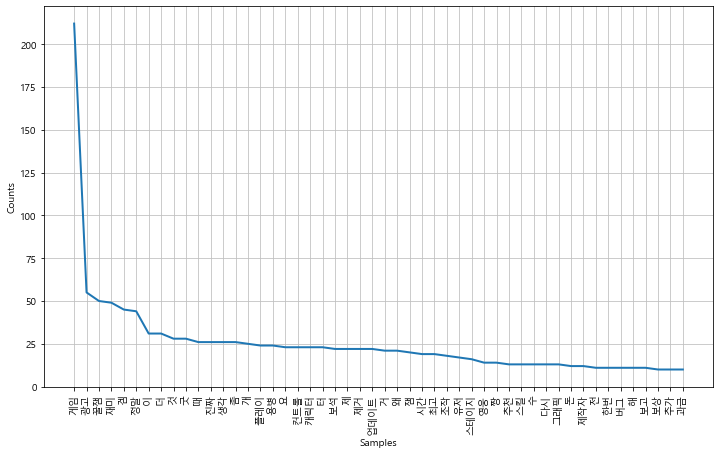

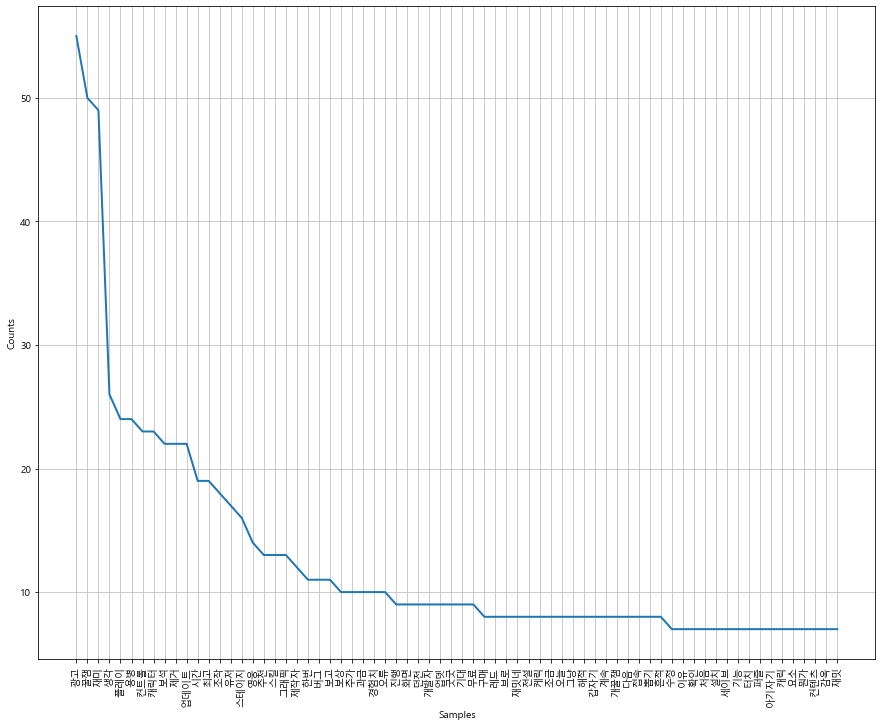

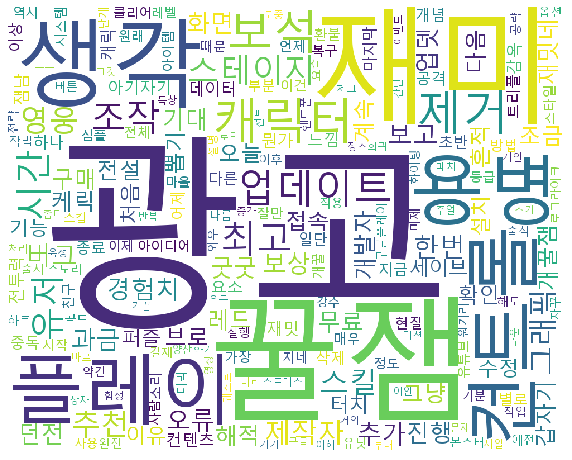

In [3]:
browser = webdriver.Chrome('C:\data\chromedriver.exe')
browser.set_window_size(1920,1080)
browser.get('https://play.google.com/store/apps/details?id=com.playhardlab.android.redbros&showAllReviews=true')
time.sleep(4)
txt=[]
for i in range(40):
    try:
        browser.find_element_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div[2]/div/span/span').click()
        time.sleep(2)
    except Exception as e:
        browser.find_element_by_tag_name('body').send_keys(Keys.END)
        time.sleep(5)
soup=BeautifulSoup(browser.page_source,'html.parser')
for k in soup.findAll('div',{'jscontroller':'LVJlx'}):
    txt.append(k.find('span').text)
browser.quit()
txt

import nltk
from konlpy.tag import Okt
okt = Okt()

new=''
for i in txt:
    new= new+' '+i

new2=okt.nouns(new)
t= nltk.Text(new2)
plt.figure(figsize=(12,7))
t.plot(50) #빈도수가 많은 상위50개만 그래프를 그린것.
stopword = ['게임','리뷰','정말','아주','다시','진짜','겜','것','때','저','이','제','단','뭐','가요','터','습'] 
new3=[i for i in new2 if (i not in stopword) and (len(i) >= 2) ]
t2= nltk.Text(new3)
plt.figure(figsize=(15,12))
t2.plot(70)
t2
t2.vocab()
wordcloud=WordCloud(font_path='c://windows//Fonts//malgun.ttf',stopwords=STOPWORDS,
                    background_color='white',width=1000,height=800).generate_from_frequencies(t2.vocab())
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
